## NPV-MINI PROJECT

In [7]:
#importing all the necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import plotly
import seaborn as sns
sns.set(color_codes  = True)
%matplotlib inline
import warnings
warnings.filterwarnings(action = 'ignore')

In [99]:
#reading the employee health data from the csv file

df_emp = pd.read_csv('emp_health.csv')
df_emp

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
0,i10012,19,female,27.900,0,daily,yes,southwest,16884.92400
1,i10013,18,male,33.770,1,weekend,no,south,1725.55230
2,i10014,28,male,33.000,3,rarely,no,south,4449.46200
3,i10015,33,male,22.705,0,daily,no,northwest,21984.47061
4,i10016,32,male,28.880,0,party,no,northwest,3866.85520
...,...,...,...,...,...,...,...,...,...
1333,i11345,50,male,30.970,3,no,no,west,10600.54830
1334,i11346,18,female,31.920,0,daily,no,east,2205.98080
1335,i11347,18,female,36.850,0,weekend,no,southeast,1629.83350
1336,i11348,21,female,25.800,0,party,no,southwest,2007.94500


### a. Reading some rows of dataset

In [9]:
#using .iloc to specify the range of row indices,excludes the endpoint
df_emp.iloc[0:7]

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
0,i10012,19,female,27.900,0,daily,yes,southwest,16884.92400
1,i10013,18,male,33.770,1,weekend,no,south,1725.55230
2,i10014,28,male,33.000,3,rarely,no,south,4449.46200
3,i10015,33,male,22.705,0,daily,no,northwest,21984.47061
4,i10016,32,male,28.880,0,party,no,northwest,3866.85520
5,i10017,31,female,25.740,0,no,no,south,3756.62160
6,i10018,46,female,33.440,1,daily,no,south,8240.58960


In [10]:
df_emp.iloc[[1,3,8,1331]]

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
1,i10013,18,male,33.770,1,weekend,no,south,1725.55230
3,i10015,33,male,22.705,0,daily,no,northwest,21984.47061
8,i10020,37,male,29.830,2,party,no,north,6406.41070
1331,i11343,23,female,33.400,0,daily,no,southwest,10795.93733


### b. Learn data types of all features

In [11]:
df_emp.dtypes

id              object
age              int64
sex             object
bmi            float64
dependent        int64
alcohol         object
smoke           object
zone            object
expenditure    float64
dtype: object

### c. See the statistical properties of the data.

In [12]:
df_emp.describe()

,age,bmi,dependent,expenditure
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### 1. How many employees above 50 age smoke, what is their average expenditure on health management?

In [13]:
 #filtering out the employees who smoke and their age is above 50
df50 = df_emp[(df_emp['age'] > 50) & (df_emp['smoke'] == 'yes')]
df50

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
11,i10023,62,female,26.290,0,daily,yes,south,27808.72510
39,i10051,60,male,39.900,0,daily,yes,southwest,48173.36100
55,i10067,58,male,36.955,2,weekend,yes,northwest,47496.49445
58,i10070,53,female,22.880,1,daily,yes,south,23244.79020
86,i10098,57,female,31.160,0,no,yes,northwest,43578.93940
...,...,...,...,...,...,...,...,...,...
1265,i11277,64,male,23.760,0,weekend,yes,southeast,26926.51440
1284,i11296,61,male,36.300,1,daily,yes,southwest,47403.88000
1301,i11313,62,male,30.875,3,no,yes,west,46718.16325
1321,i11333,62,male,26.695,0,daily,yes,east,28101.33305


In [14]:
#.mean() function provides the average expenditure
df50['expenditure'].mean()

38820.22308234375

### 2. How many female employees did not consume alcohol daily. What is their proportion with respect to total female employees?

In [15]:
df_emp[(df_emp['sex'] == 'female') & (df_emp['alcohol'] != 'daily')]

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
5,i10017,31,female,25.74,0,no,no,south,3756.62160
7,i10019,37,female,27.74,3,weekend,no,northwest,7281.50560
9,i10021,60,female,25.84,0,no,no,northwest,28923.13692
13,i10025,56,female,39.82,0,weekend,no,south,11090.71780
16,i10028,52,female,30.78,1,party,no,north,10797.33620
...,...,...,...,...,...,...,...,...,...
1330,i11342,57,female,25.74,2,no,no,southeast,12629.16560
1332,i11344,52,female,44.70,3,party,no,southwest,11411.68500
1335,i11347,18,female,36.85,0,weekend,no,southeast,1629.83350
1336,i11348,21,female,25.80,0,party,no,southwest,2007.94500


### 3. Display zone wise average expenditure of employees on health

In [17]:
df_zonewise = df_emp.groupby(by = 'zone',as_index= False).mean('expenditure')
df_zonewise[['zone','expenditure']]

,zone,expenditure
0,east,13774.679941
1,north,14102.583403
2,northeast,13694.721724
3,northwest,12151.702619
4,south,14715.689519
5,southeast,14452.949680
6,southwest,12717.083869
7,west,12182.998872


### 4. Employees of which zone did maximum expenditure on health

In [29]:
df_zone_maxexp = df_emp.groupby(by = 'zone',as_index=False)
max_val = df_zone_maxexp['expenditure'].max()
print(max_val)

        zone  expenditure
0       east  58571.07448
1      north  48549.17835
2  northeast  46255.11250
3  northwest  55135.40209
4      south  47055.53210
5  southeast  63770.42801
6  southwest  52590.82939
7       west  60021.39897


In [18]:
df_zonewise['zone'] 

0         east
1        north
2    northeast
3    northwest
4        south
5    southeast
6    southwest
7         west
Name: zone, dtype: object

### 5. What is the minimum expenditure done by any employee in organization

In [30]:
df_emp['expenditure'].min()

1121.8739

### 6. What is average expenditure of employees who have 2 or lesser dependents

In [31]:
df_lessdep = df_emp[df_emp['dependent'] <= 2]
df_lessdep['expenditure'].mean()

13040.970970948145

### 7. How many employees are below age of 20 years. What is their average BMI

In [32]:
df_b20 = df_emp[df_emp['age'] < 20]
print(df_b20)
print("No.of people below 20 years of age :",len(df_b20.index))
print('The average bmi of people below 20 years of age is :',df_b20['bmi'].mean())

          id  age     sex     bmi  dependent  alcohol smoke       zone  \
0     i10012   19  female  27.900          0    daily   yes  southwest   
1     i10013   18    male  33.770          1  weekend    no      south   
15    i10027   19    male  24.600          1    party    no  southwest   
22    i10034   18    male  34.100          0    daily    no      south   
31    i10043   18  female  26.315          0    daily    no      north   
...      ...  ...     ...     ...        ...      ...   ...        ...   
1315  i11327   18    male  28.310          1  weekend    no       east   
1316  i11328   19  female  20.600          0  weekend    no  southwest   
1317  i11329   18    male  53.130          0    party    no  southeast   
1334  i11346   18  female  31.920          0    daily    no       east   
1335  i11347   18  female  36.850          0  weekend    no  southeast   

      expenditure  
0     16884.92400  
1      1725.55230  
15     1837.23700  
22     1137.01100  
31     2198

### 8. Create a dataframe "non_smoker" for all non-smoker male employees

In [33]:
df_male_nonsmoke = df_emp[(df_emp['smoke'] == 'no') & (df_emp['sex'] == 'male')]
df_male_nonsmoke

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
1,i10013,18,male,33.770,1,weekend,no,south,1725.55230
2,i10014,28,male,33.000,3,rarely,no,south,4449.46200
3,i10015,33,male,22.705,0,daily,no,northwest,21984.47061
4,i10016,32,male,28.880,0,party,no,northwest,3866.85520
8,i10020,37,male,29.830,2,party,no,north,6406.41070
...,...,...,...,...,...,...,...,...,...
1324,i11336,31,male,25.935,1,daily,no,west,4239.89265
1325,i11337,61,male,33.535,0,party,no,east,13143.33665
1327,i11339,51,male,30.030,1,daily,no,southeast,9377.90470
1329,i11341,52,male,38.600,2,party,no,southwest,10325.20600


### 9. Create a dataframe "non_alcoholic" for all male employees who do not consume alcohol

In [34]:
df_male_nonalcohol = df_emp[(df_emp['sex'] == 'male') & (df_emp['alcohol'] == 'no')]
df_male_nonalcohol

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
18,i10030,56,male,40.300,0,no,no,southwest,10602.38500
24,i10036,37,male,28.025,2,no,no,northwest,6203.90175
28,i10040,23,male,17.385,1,no,no,northwest,2775.19215
37,i10049,26,male,20.800,0,no,no,southwest,2302.30000
38,i10050,35,male,36.670,1,no,yes,north,39774.27630
...,...,...,...,...,...,...,...,...,...
1291,i11303,19,male,34.900,0,no,yes,southwest,34828.65400
1301,i11313,62,male,30.875,3,no,yes,west,46718.16325
1310,i11322,42,male,26.315,1,no,no,west,6940.90985
1320,i11332,31,male,31.065,3,no,no,west,5425.02335


### 10. Create a dataframe called "non_smoking_alcoholic" with the men employees who do not smoke and consume alcohol. The dataframe should contain columns id, smoke, alcohol
(Hint:Use join and dataframes created in Q8 and Q9)


In [35]:
df_non_smoking_alcoholic_men = pd.merge(df_male_nonalcohol,df_male_nonsmoke,on = ['smoke','alcohol'])
df_non_smoking_alcoholic_men

,id_x,age_x,sex_x,bmi_x,dependent_x,alcohol,smoke,zone_x,expenditure_x,id_y,age_y,sex_y,bmi_y,dependent_y,zone_y,expenditure_y
0,i10030,56,male,40.30,0,no,no,southwest,10602.3850,i10030,56,male,40.300,0,southwest,10602.38500
1,i10030,56,male,40.30,0,no,no,southwest,10602.3850,i10036,37,male,28.025,2,northwest,6203.90175
2,i10030,56,male,40.30,0,no,no,southwest,10602.3850,i10040,23,male,17.385,1,northwest,2775.19215
3,i10030,56,male,40.30,0,no,no,southwest,10602.3850,i10049,26,male,20.800,0,southwest,2302.30000
4,i10030,56,male,40.30,0,no,no,southwest,10602.3850,i10079,40,male,26.315,1,northwest,6389.37785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11876,i11345,50,male,30.97,3,no,no,west,10600.5483,i11273,28,male,37.100,1,southwest,3277.16100
11877,i11345,50,male,30.97,3,no,no,west,10600.5483,i11282,26,male,33.915,1,west,3292.52985
11878,i11345,50,male,30.97,3,no,no,west,10600.5483,i11322,42,male,26.315,1,west,6940.90985
11879,i11345,50,male,30.97,3,no,no,west,10600.5483,i11332,31,male,31.065,3,west,5425.02335


In [36]:
df1 = df_male_nonsmoke[df_male_nonsmoke['alcohol'] == 'no']
df2 = df_male_nonalcohol[df_male_nonalcohol['smoke'] == 'no']
df2

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
18,i10030,56,male,40.300,0,no,no,southwest,10602.38500
24,i10036,37,male,28.025,2,no,no,northwest,6203.90175
28,i10040,23,male,17.385,1,no,no,northwest,2775.19215
37,i10049,26,male,20.800,0,no,no,southwest,2302.30000
67,i10079,40,male,26.315,1,no,no,northwest,6389.37785
...,...,...,...,...,...,...,...,...,...
1261,i11273,28,male,37.100,1,no,no,southwest,3277.16100
1270,i11282,26,male,33.915,1,no,no,west,3292.52985
1310,i11322,42,male,26.315,1,no,no,west,6940.90985
1320,i11332,31,male,31.065,3,no,no,west,5425.02335


In [37]:
pd.merge(df1,df2)

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
0,i10030,56,male,40.300,0,no,no,southwest,10602.38500
1,i10036,37,male,28.025,2,no,no,northwest,6203.90175
2,i10040,23,male,17.385,1,no,no,northwest,2775.19215
3,i10049,26,male,20.800,0,no,no,southwest,2302.30000
4,i10079,40,male,26.315,1,no,no,northwest,6389.37785
...,...,...,...,...,...,...,...,...,...
104,i11273,28,male,37.100,1,no,no,southwest,3277.16100
105,i11282,26,male,33.915,1,no,no,west,3292.52985
106,i11322,42,male,26.315,1,no,no,west,6940.90985
107,i11332,31,male,31.065,3,no,no,west,5425.02335


### 11.What is the count for each zone with respect to number of dependent

In [38]:
df_zonedep = df_emp.groupby(by = 'zone',as_index = False).sum()
df_zonedep[['zone','dependent']]

,zone,dependent
0,east,254
1,north,85
2,northeast,86
3,northwest,143
4,south,85
5,southeast,211
6,southwest,275
7,west,326


### 12. Classify the employees into 3 categories.
 

In [39]:
df_emp

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
0,i10012,19,female,27.900,0,daily,yes,southwest,16884.92400
1,i10013,18,male,33.770,1,weekend,no,south,1725.55230
2,i10014,28,male,33.000,3,rarely,no,south,4449.46200
3,i10015,33,male,22.705,0,daily,no,northwest,21984.47061
4,i10016,32,male,28.880,0,party,no,northwest,3866.85520
...,...,...,...,...,...,...,...,...,...
1333,i11345,50,male,30.970,3,no,no,west,10600.54830
1334,i11346,18,female,31.920,0,daily,no,east,2205.98080
1335,i11347,18,female,36.850,0,weekend,no,southeast,1629.83350
1336,i11348,21,female,25.800,0,party,no,southwest,2007.94500


In [40]:
#1.Underweight
df_underweight = df_emp[df_emp['bmi'] < 18.5]
df_underweight

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
28,i10040,23,male,17.385,1,no,no,northwest,2775.19215
128,i10140,32,female,17.765,2,weekend,yes,northwest,32734.18630
172,i10184,18,male,15.960,0,party,no,north,1694.79640
198,i10210,51,female,18.050,0,weekend,no,northwest,9644.25250
232,i10244,19,female,17.800,0,party,no,southwest,1727.78500
250,i10262,18,male,17.290,2,party,yes,north,12829.45510
380,i10392,27,female,17.955,2,party,yes,east,15006.57945
410,i10422,19,male,17.480,0,weekend,no,west,1621.34020
412,i10424,26,female,17.195,2,no,yes,east,14455.64405
428,i10440,21,female,16.815,1,daily,no,east,3167.45585


In [149]:
import numpy as np

In [151]:
len(df_underweight.index)

20

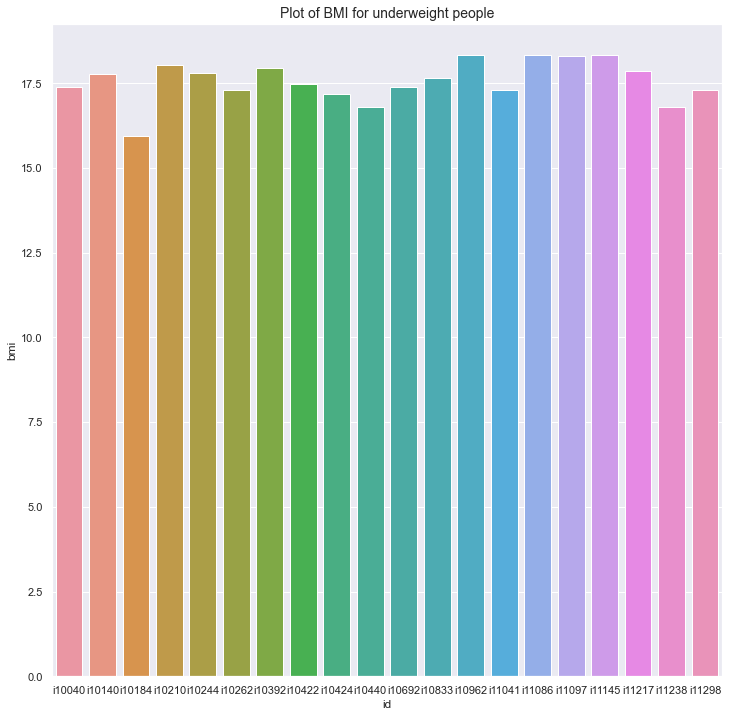

In [42]:
plt.figure(figsize= (12,12))
sns.barplot(data = df_underweight,x = 'id',y = 'bmi');
plt.title('Plot of BMI for underweight people',fontdict=  {'fontsize': 14} );

In [43]:
#2.fit people
df_fit = df_emp[(df_emp['bmi'] >= 18.5) & (df_emp['bmi'] <= 24.9)]
df_fit

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
3,i10015,33,male,22.705,0,daily,no,northwest,21984.47061
15,i10027,19,male,24.600,1,party,no,southwest,1837.23700
17,i10029,23,male,23.845,0,weekend,no,north,2395.17155
26,i10038,63,female,23.085,0,weekend,no,north,14451.83515
35,i10047,19,male,20.425,0,party,no,northwest,1625.43375
...,...,...,...,...,...,...,...,...,...
1304,i11316,42,male,24.605,2,daily,yes,east,21259.37795
1306,i11318,29,female,21.850,0,weekend,yes,east,16115.30450
1314,i11326,30,female,23.655,3,daily,yes,west,18765.87545
1316,i11328,19,female,20.600,0,weekend,no,southwest,1731.67700


In [152]:
len(df_fit.index)

222

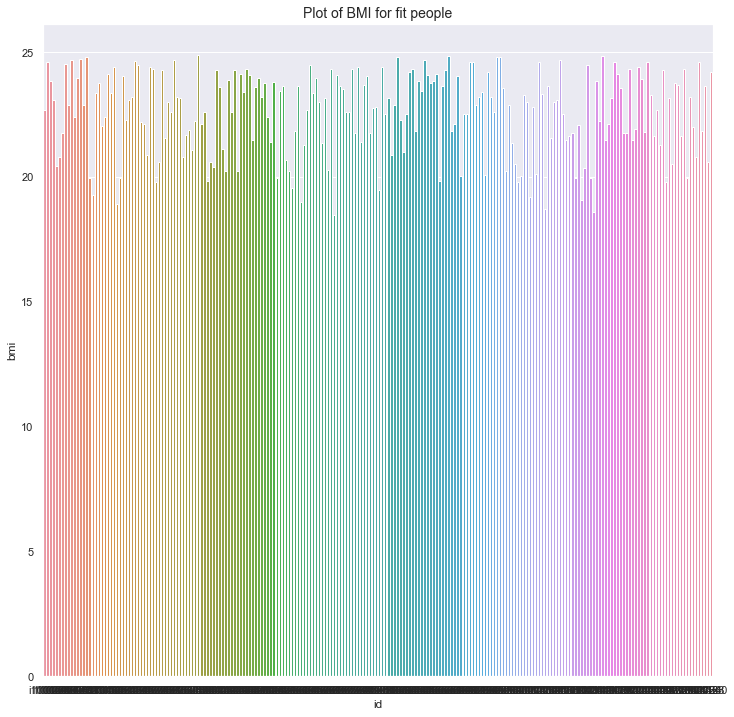

In [154]:
plt.figure(figsize= (12,12))
sns.barplot(data = df_fit,x = 'id',y = 'bmi');
plt.title('Plot of BMI for fit people',fontdict=  {'fontsize': 14,'horizontalalignment': 'center'} );

In [48]:
df_overweight = df_emp[df_emp['bmi'] > 24.9]
df_overweight

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
0,i10012,19,female,27.90,0,daily,yes,southwest,16884.9240
1,i10013,18,male,33.77,1,weekend,no,south,1725.5523
2,i10014,28,male,33.00,3,rarely,no,south,4449.4620
4,i10016,32,male,28.88,0,party,no,northwest,3866.8552
5,i10017,31,female,25.74,0,no,no,south,3756.6216
...,...,...,...,...,...,...,...,...,...
1333,i11345,50,male,30.97,3,no,no,west,10600.5483
1334,i11346,18,female,31.92,0,daily,no,east,2205.9808
1335,i11347,18,female,36.85,0,weekend,no,southeast,1629.8335
1336,i11348,21,female,25.80,0,party,no,southwest,2007.9450


In [155]:
len(df_overweight.index)

1096

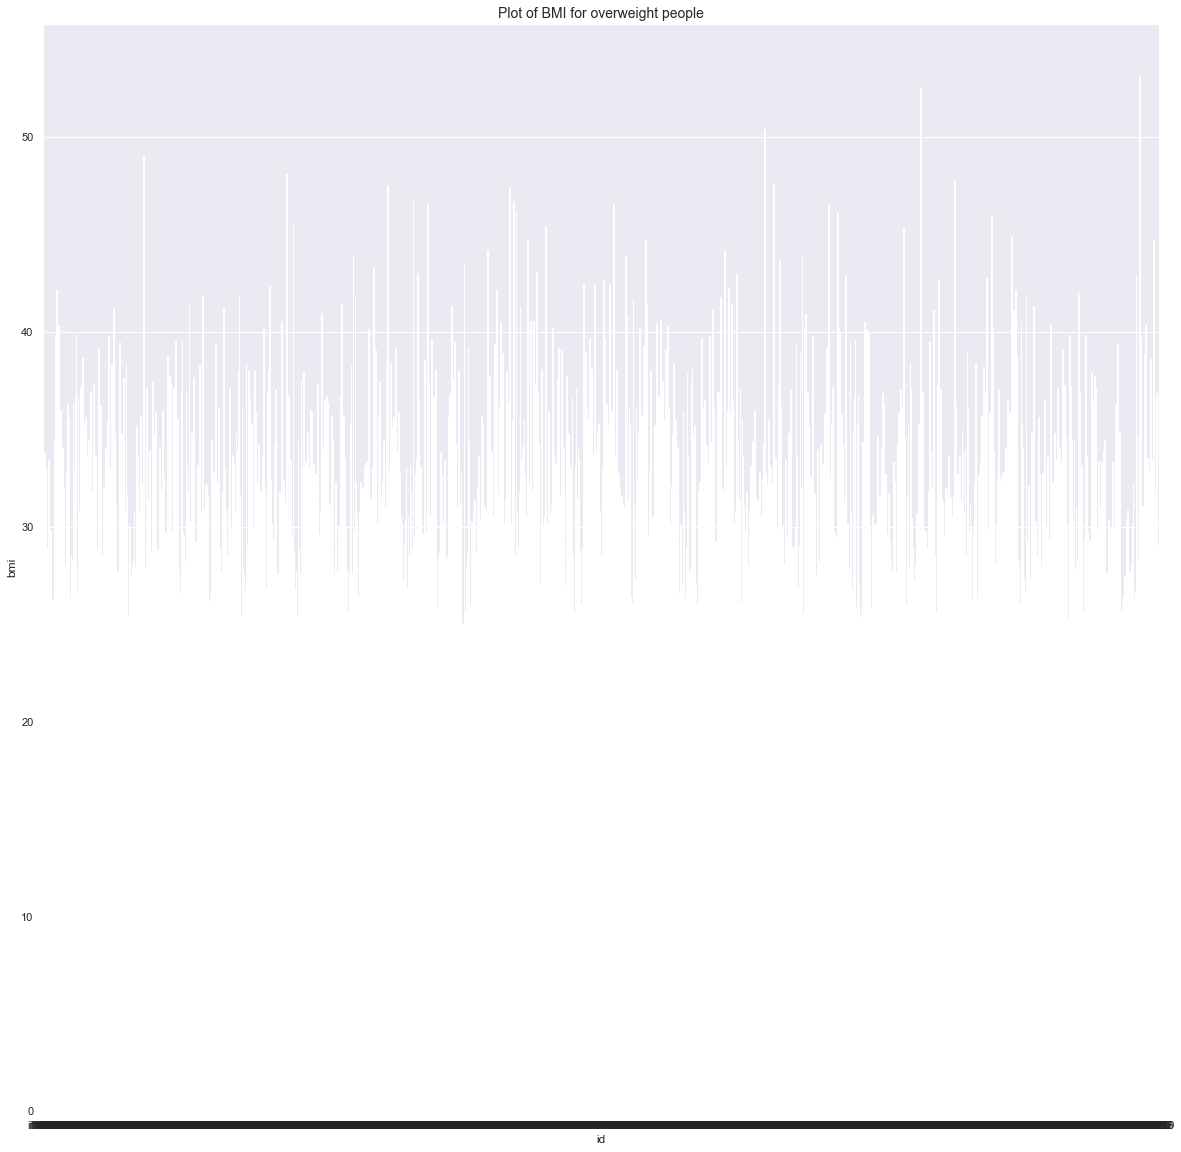

In [156]:
plt.figure(figsize=(20,20))
sns.barplot(x = 'id',y = 'bmi',data = df_overweight);
plt.title('Plot of BMI for overweight people',fontdict=  {'fontsize': 14,'horizontalalignment': 'center'} );

### 13. Draw line plot of expenditure against age and BMI

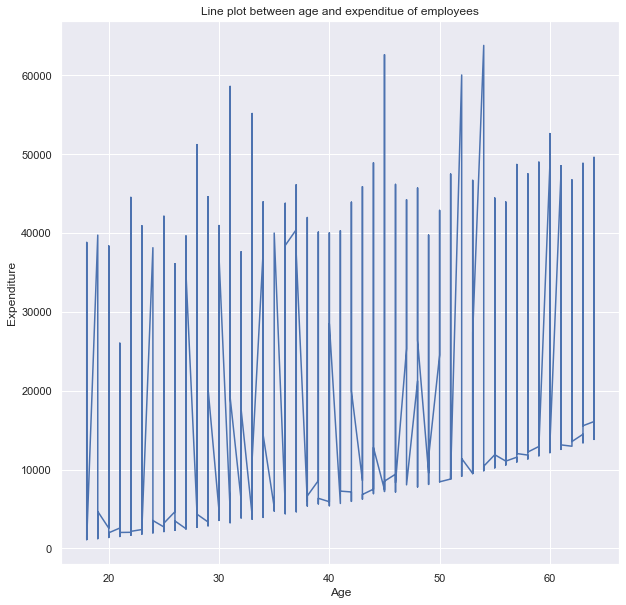

In [60]:
df_ageexp = df_emp.sort_values(by = 'age')
plt.figure(figsize=(10,10))
plt.plot('age','expenditure',data = df_ageexp);
plt.xlabel('Age');
plt.ylabel('Expenditure');
plt.title('Line plot between age and expenditue of employees');

### 14. Draw a bar chart to show zone wise average expenditure

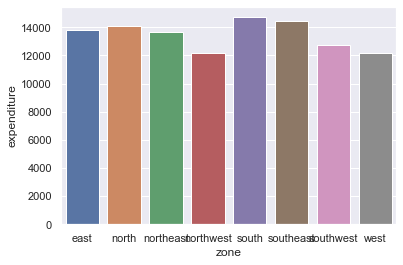

In [61]:
sns.barplot(x = 'zone',y = 'expenditure',data = df_zonewise);

### 15. Draw a bar chart to show smoking and alcoholic habits against average expenditure

In [62]:
df_emp

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
0,i10012,19,female,27.900,0,daily,yes,southwest,16884.92400
1,i10013,18,male,33.770,1,weekend,no,south,1725.55230
2,i10014,28,male,33.000,3,rarely,no,south,4449.46200
3,i10015,33,male,22.705,0,daily,no,northwest,21984.47061
4,i10016,32,male,28.880,0,party,no,northwest,3866.85520
...,...,...,...,...,...,...,...,...,...
1333,i11345,50,male,30.970,3,no,no,west,10600.54830
1334,i11346,18,female,31.920,0,daily,no,east,2205.98080
1335,i11347,18,female,36.850,0,weekend,no,southeast,1629.83350
1336,i11348,21,female,25.800,0,party,no,southwest,2007.94500


In [129]:
df_smokevsavgexp =df_emp.groupby(by = 'smoke',as_index= False).mean('expenditure')

df_smokevsavgexp

,smoke,age,bmi,dependent,expenditure
0,no,39.385338,30.651795,1.090226,8434.268298
1,yes,38.514599,30.708449,1.113139,32050.231832


In [140]:
df_alcoholavgexp = df_emp.groupby(by = 'alcohol',as_index = False).mean('expenditure')
df_alcoholavgexp

,alcohol,age,bmi,dependent,expenditure
0,daily,38.969620,30.588342,1.088608,13001.772968
1,no,39.548263,30.529151,1.000000,14277.090885
2,party,38.780576,31.004712,1.104317,13050.583157
3,rarely,33.508475,31.164576,0.949153,12419.686784
4,weekend,40.533141,30.490375,1.190202,13145.632539


Text(0.5, 1.0, 'Smoking habits vs avg.expenditure')

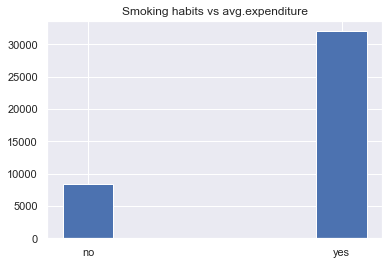

In [141]:
plt.bar(x = 'smoke',height = 'expenditure',width = 0.2,data = df_smokevsavgexp);
plt.title("Smoking habits vs avg.expenditure")

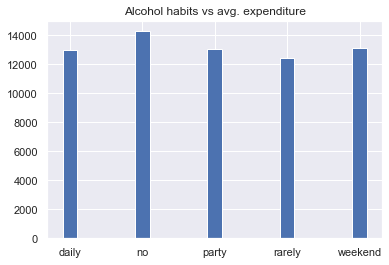

In [143]:
plt.bar(x= 'alcohol',height = 'expenditure',width = 0.2,data = df_alcoholavgexp);
plt.title("Alcohol habits vs avg. expenditure");

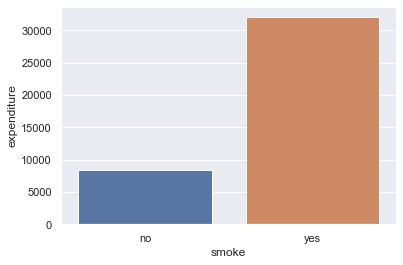

In [144]:
sns.barplot(x ='smoke',y = 'expenditure',data = df_smokevsavgexp);


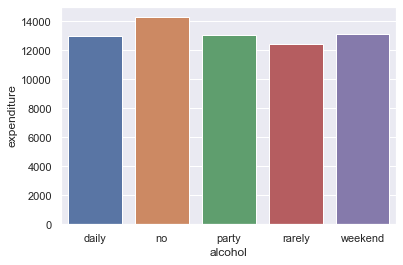

In [145]:
sns.barplot(x = 'alcohol',y = 'expenditure',data = df_alcoholavgexp);

### 16. Draw pie chart for alcohol consumption habits

In [96]:
df_alcohol = df_emp.groupby(by ='alcohol').count()
df_alcohol

,id,age,sex,bmi,dependent,smoke,zone,expenditure
alcohol,,,,,,,,
daily,395,395,395,395,395,395,395,395
no,259,259,259,259,259,259,259,259
party,278,278,278,278,278,278,278,278
rarely,59,59,59,59,59,59,59,59
weekend,347,347,347,347,347,347,347,347


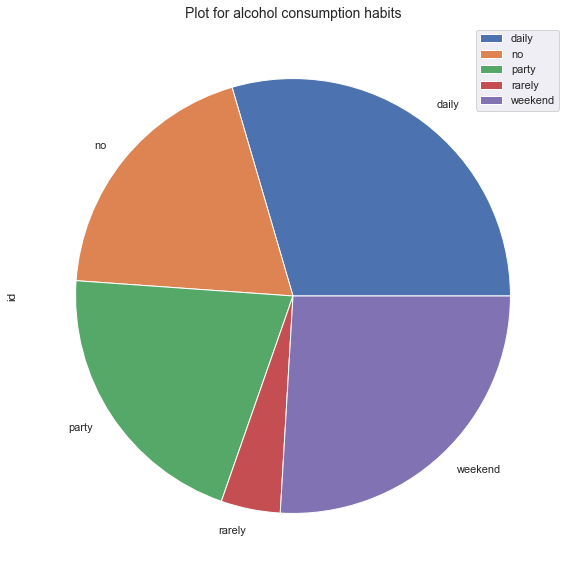

In [110]:
df_alcohol.plot.pie(y = 'id',figsize =((10,10)));
plt.title('Plot for alcohol consumption habits',fontdict=  {'fontsize': 14,'horizontalalignment': 'center'} );

### 17. Draw scatterplot to see the relation between age and expenditure, keep smoking habit as hue

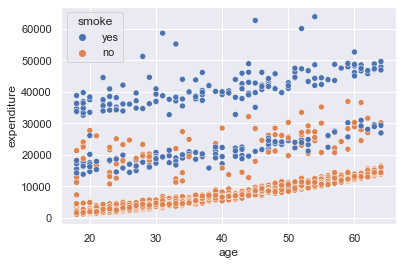

In [72]:
sns.scatterplot(x='age',y = 'expenditure',data = df_emp,hue ='smoke');

### 18. Draw distribution plot of expenditure

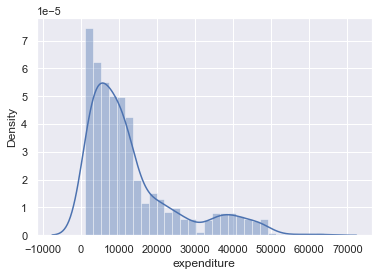

In [73]:
sns.distplot(df_emp['expenditure']);

### 19. Display the pairplot

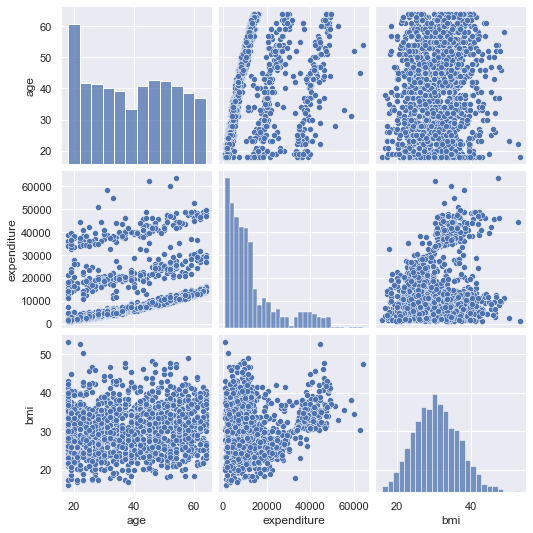

In [74]:
sns.pairplot(df_emp[['age','expenditure','bmi']]);

### 20. Display heatmap for the data

In [75]:
cmat = df_emp.corr()
cmat

,age,bmi,dependent,expenditure
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
dependent,0.042469,0.012759,1.000000,0.067998
expenditure,0.299008,0.198341,0.067998,1.000000


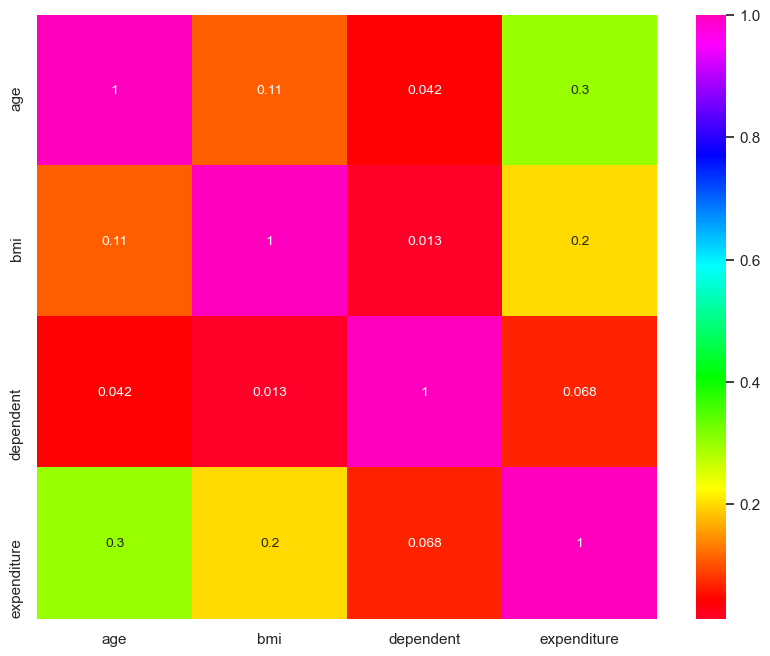

In [106]:
plt.figure(figsize= ((10,8)),dpi = 100)
sns.heatmap(data =cmat,annot = True,cmap= 'gist_rainbow');